# Import Packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
LCL_df = pd.read_csv('/content/drive/MyDrive/Low Carbon dataset/CC_LCL-FullData.csv')

In [4]:
LCL_df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [5]:
# Strip leading/trailing spaces from column names
LCL_df.columns = LCL_df.columns.str.strip()

# Convert DateTime column to datetime
LCL_df['DateTime'] = pd.to_datetime(LCL_df['DateTime'])

# Convert 'KWH/hh (per half hour)' column to numeric
LCL_df['KWH/hh (per half hour)'] = pd.to_numeric(LCL_df['KWH/hh (per half hour)'], errors='coerce')


# Inspect the Data

In [6]:
# Display basic information about the dataset
LCL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   LCLid                   object        
 1   stdorToU                object        
 2   DateTime                datetime64[ns]
 3   KWH/hh (per half hour)  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.0+ GB


In [7]:
# Check for any missing values
LCL_df.isnull().sum()

LCLid                        0
stdorToU                     0
DateTime                     0
KWH/hh (per half hour)    5560
dtype: int64

In [8]:
# Display summary statistics
LCL_df.describe()

,DateTime,KWH/hh (per half hour)
count,167932474,1.679269e+08
mean,2013-03-28 05:35:22.133241344,2.117630e-01
min,2011-11-23 09:00:00,0.000000e+00
25%,2012-10-21 20:30:00,5.800000e-02
50%,2013-03-30 05:30:00,1.170000e-01
75%,2013-09-10 09:00:00,2.390000e-01
max,2014-02-28 00:00:00,1.076100e+01
std,NaN,2.972592e-01


# Load Tariffs data

In [9]:
# Load the tariffs data
tariffs = pd.read_excel("/content/drive/MyDrive/Low Carbon dataset/Tariffs.xlsx")

In [10]:
tariffs.head()

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


# Inspect the data

In [11]:
# Display basic information about the dataset
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TariffDateTime  17520 non-null  datetime64[ns]
 1   Tariff          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [12]:
# Check for any missing values
tariffs.isnull().sum()

TariffDateTime    0
Tariff            0
dtype: int64

In [13]:
# Display summary statistics
tariffs.describe()

,TariffDateTime
count,17520
mean,2013-07-02 11:45:00
min,2013-01-01 00:00:00
25%,2013-04-02 05:52:30
50%,2013-07-02 11:45:00
75%,2013-10-01 17:37:30
max,2013-12-31 23:30:00


# Merge Datasets

In [14]:
# Merge datasets on DateTime (if needed)
merged_data = pd.merge(LCL_df, tariffs, left_on='DateTime', right_on='TariffDateTime', how='left')

# Set the DateTime column as the index
merged_data.set_index('DateTime', inplace=True)


In [28]:
merged_data.head()

,LCLid,stdorToU,KWH/hh (per half hour),TariffDateTime,Tariff
DateTime,,,,,
2012-10-12 00:30:00,MAC000002,Std,0.0,NaT,NaN
2012-10-12 01:00:00,MAC000002,Std,0.0,NaT,NaN
2012-10-12 01:30:00,MAC000002,Std,0.0,NaT,NaN
2012-10-12 02:00:00,MAC000002,Std,0.0,NaT,NaN
2012-10-12 02:30:00,MAC000002,Std,0.0,NaT,NaN


In [29]:
merged_data.isnull().sum()

LCLid                            0
stdorToU                         0
KWH/hh (per half hour)        5560
TariffDateTime            74844649
Tariff                    74844649
dtype: int64

# Visualize Daily Energy Consumption

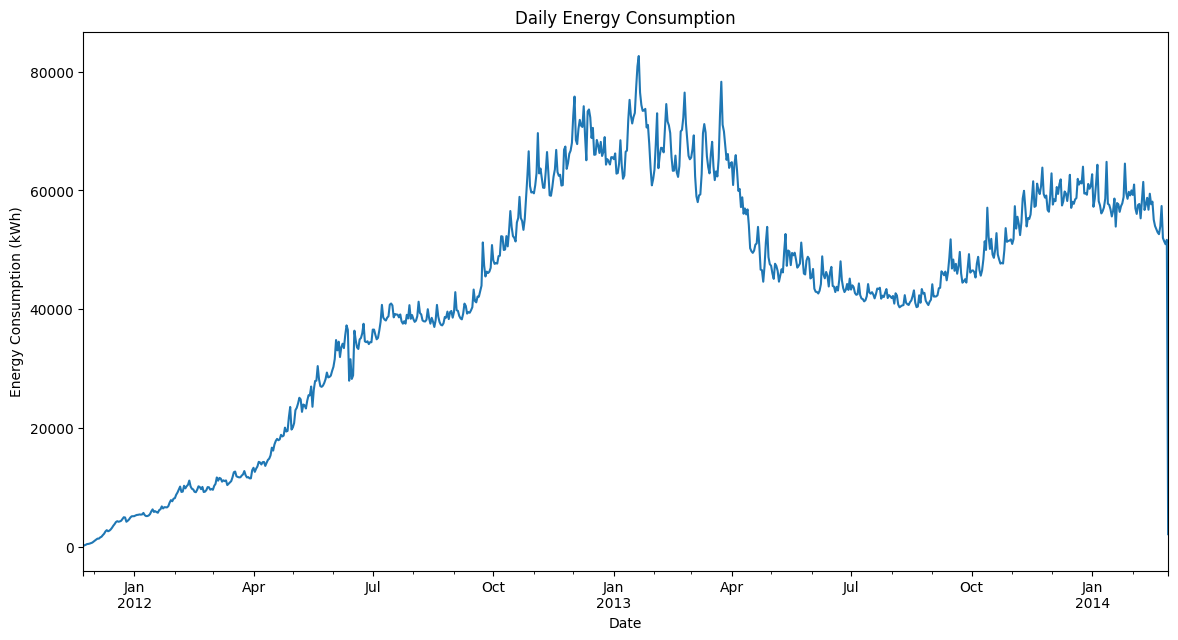

In [15]:
# Resample the data to daily frequency and plot
daily_consumption = merged_data['KWH/hh (per half hour)'].resample('D').sum()

plt.figure(figsize=(14, 7))
daily_consumption.plot()
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


# Segment Analysis

In [16]:
# Segment the data into dToU and flat rate customers
dtou_customers = merged_data[merged_data['stdorToU'] == 'ToU']
flat_rate_customers = merged_data[merged_data['stdorToU'] == 'Std']

# Summary statistics for each segment
dtou_summary = dtou_customers.describe()
flat_rate_summary = flat_rate_customers.describe()

print("\nSummary Statistics for dToU Customers:")
print(dtou_summary)

print("\nSummary Statistics for Flat Rate Customers:")
print(flat_rate_summary)


Summary Statistics for dToU Customers:
       KWH/hh (per half hour)                 TariffDateTime
count            3.378265e+07                       18892357
mean             1.986226e-01  2013-06-30 05:59:40.308607744
min              0.000000e+00            2013-01-01 00:00:00
25%              5.600000e-02            2013-03-30 23:00:00
50%              1.120000e-01            2013-06-29 00:30:00
75%              2.270000e-01            2013-09-29 00:30:00
max              7.567000e+00            2013-12-31 23:30:00
std              2.674341e-01                            NaN

Summary Statistics for Flat Rate Customers:
       KWH/hh (per half hour)                 TariffDateTime
count            1.341443e+08                       74195468
mean             2.150723e-01  2013-06-30 02:43:43.712166912
min              0.000000e+00            2013-01-01 00:00:00
25%              5.900000e-02            2013-03-30 14:00:00
50%              1.180000e-01            2013-06-29 00:30:00


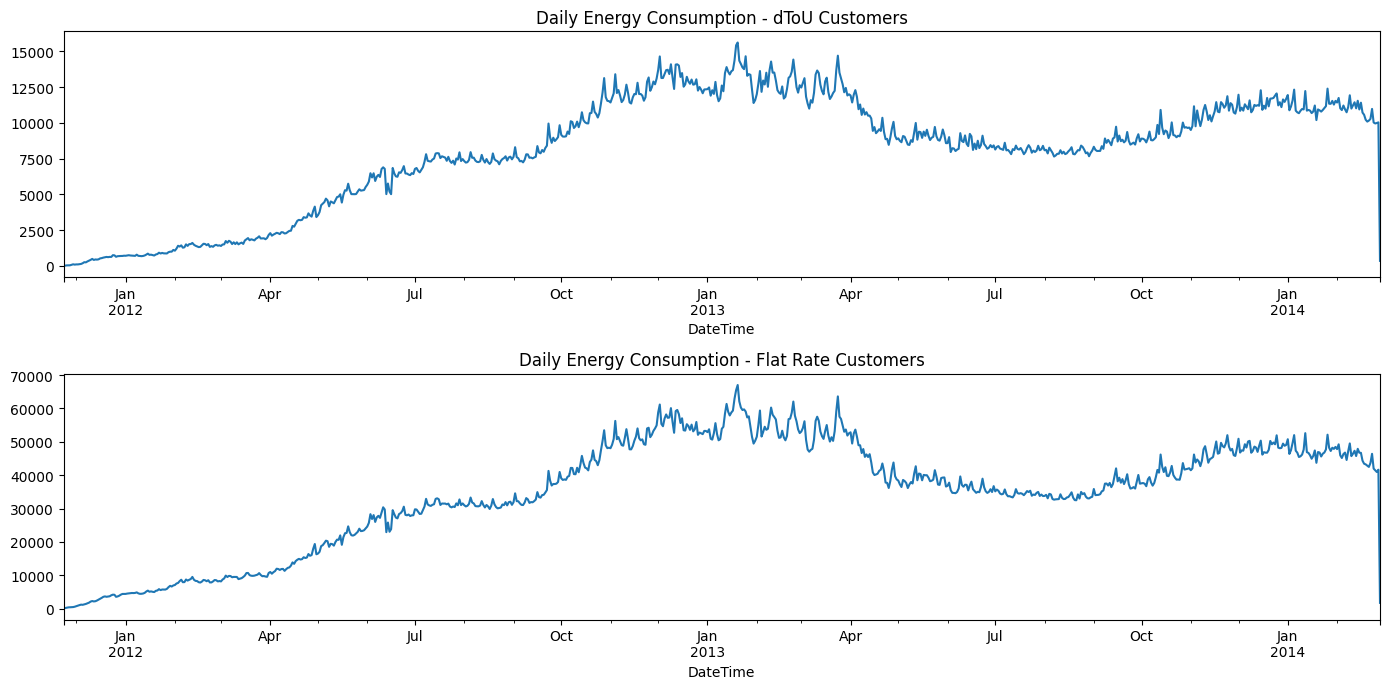

In [17]:
# Plot the energy consumption for each segment
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
dtou_customers['KWH/hh (per half hour)'].resample('D').sum().plot()
plt.title('Daily Energy Consumption - dToU Customers')

plt.subplot(2, 1, 2)
flat_rate_customers['KWH/hh (per half hour)'].resample('D').sum().plot()
plt.title('Daily Energy Consumption - Flat Rate Customers')

plt.tight_layout()
plt.show()


# Distribution Analysis

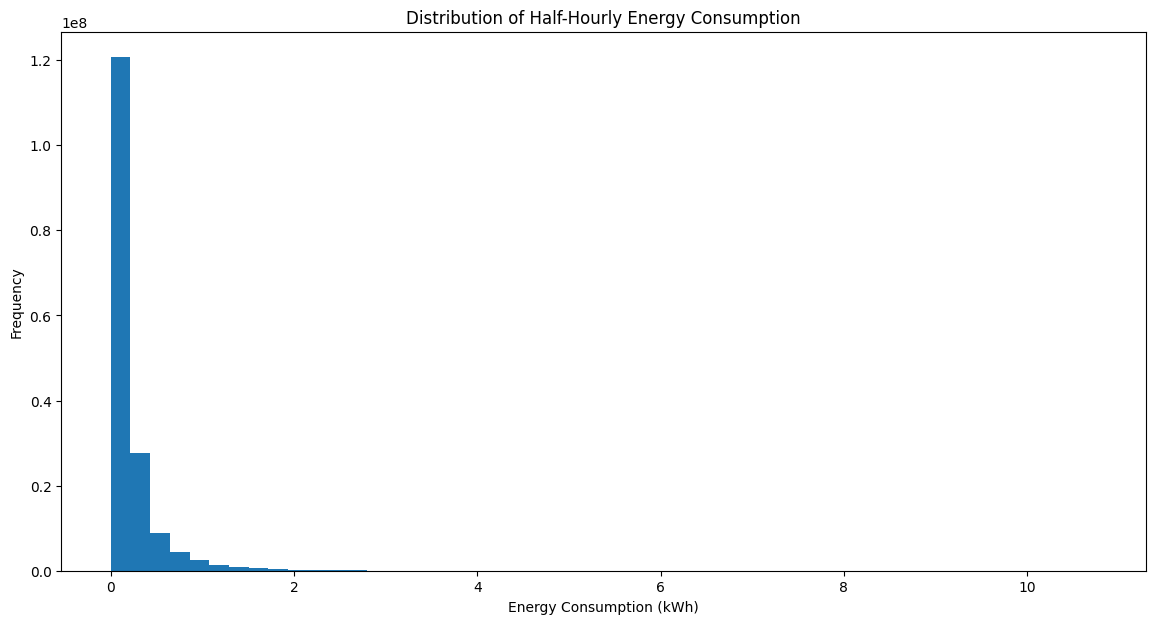

In [21]:
plt.figure(figsize=(14, 7))
LCL_df['KWH/hh (per half hour)'].plot(kind='hist', bins=50, title='Distribution of Half-Hourly Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()


# Monthly pattern

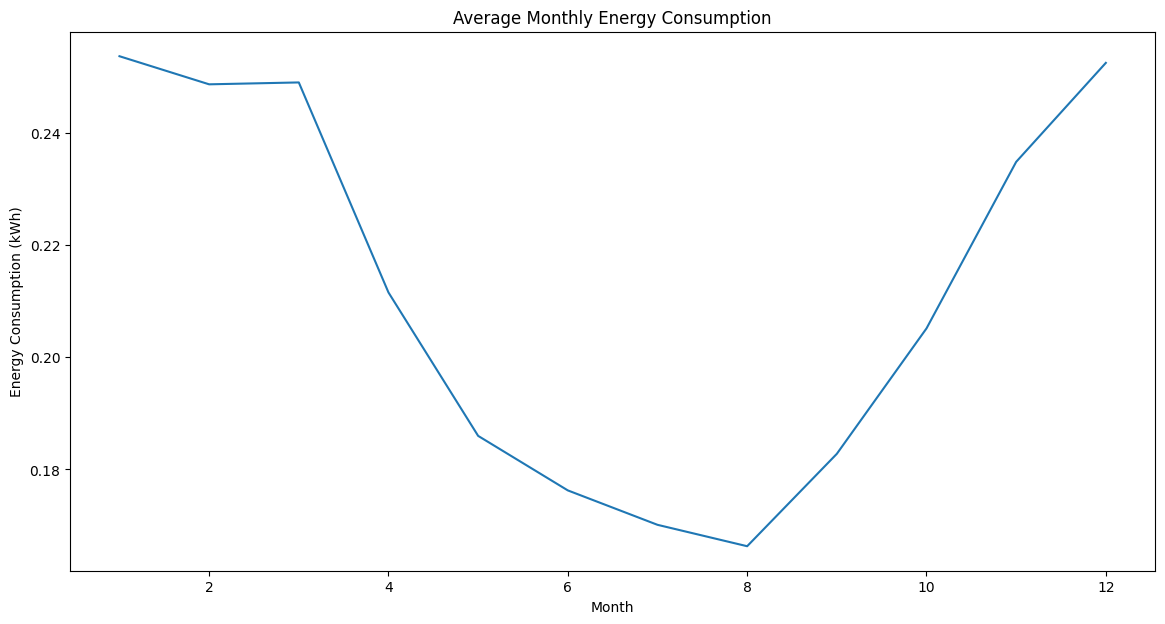

In [22]:
# Monthly pattern
LCL_df['Month'] = LCL_df['DateTime'].dt.month
monthly_pattern = LCL_df.groupby('Month')['KWH/hh (per half hour)'].mean()

plt.figure(figsize=(14, 7))
monthly_pattern.plot()
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Weekly pattern

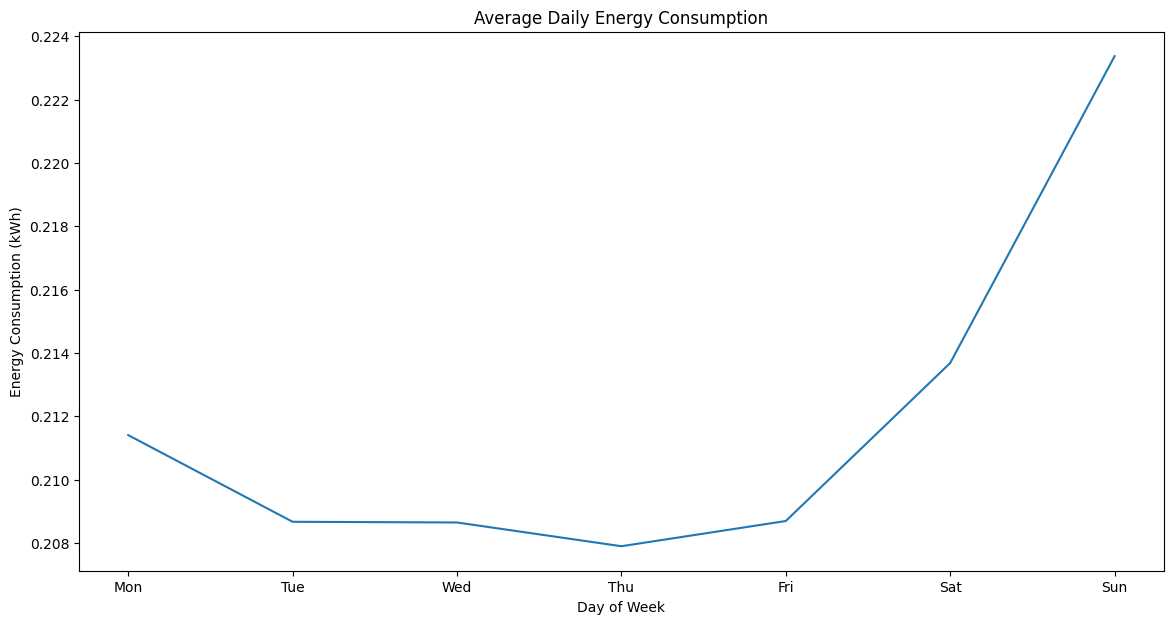

In [23]:
# Weekly pattern
LCL_df['DayOfWeek'] = LCL_df['DateTime'].dt.dayofweek
weekly_pattern = LCL_df.groupby('DayOfWeek')['KWH/hh (per half hour)'].mean()

plt.figure(figsize=(14, 7))
weekly_pattern.plot()
plt.title('Average Daily Energy Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Peak Consumption Analysis

In [24]:
peak_times = LCL_df.groupby(LCL_df['DateTime'].dt.hour)['KWH/hh (per half hour)'].mean().sort_values(ascending=False)
print("Peak Consumption Hours:")
print(peak_times.head(10))

peak_days = LCL_df.groupby(LCL_df['DateTime'].dt.date)['KWH/hh (per half hour)'].sum().sort_values(ascending=False)
print("Peak Consumption Days:")
print(peak_days.head(10))


Peak Consumption Hours:
DateTime
19    0.320865
20    0.312831
18    0.312068
21    0.293842
17    0.281246
22    0.254247
16    0.241415
12    0.216393
15    0.216205
9     0.215786
Name: KWH/hh (per half hour), dtype: float64
Peak Consumption Days:
DateTime
2013-01-20    82650.492003
2013-01-19    80900.962997
2013-03-24    78314.402004
2013-01-18    77294.254003
2013-02-24    76489.948987
2013-01-21    76482.469994
2012-12-02    75819.444007
2013-01-13    75265.223996
2013-02-10    74558.537007
2013-01-22    74398.342000
Name: KWH/hh (per half hour), dtype: float64
